# Análise da coleta das ementas

> Dataset: "ementa_ds.zip"


Carregando apenas os dados do **código do processo**, **número** e **texto da ementa**.<br>
As demais não possuem correlação no domínio do probrema.


In [1]:
import pandas as pd

colunas = ['CODIGO', 'PROCESSO', 'EMENTA']

df = pd.read_csv('../data/ementa_ds.zip', compression='zip', header=0, sep=',', quotechar='"', usecols=colunas)

In [2]:
# Quantidade de registros e colunas
df.shape

(111361, 3)

Verificado abaixo que existem repetições de código de processo, o implica na decisão de qual a ementa correta para classificação.

In [3]:
df.describe()

,CODIGO,PROCESSO,EMENTA
count,111361,111361,111361
unique,110673,95459,99313
top,P0000P7P70000,01522609720158240000,<br> EMBARGOS DE DECLARAÇÃO. OMISSÃO NÃO CAR...
freq,3,6,162


In [4]:
df.head()

,CODIGO,PROCESSO,EMENTA
0,P0000Q1VK12KW,00039604720138240039,<br> EMBARGOS DE DECLARAÇÃO. PRETENDIDA REDI...
1,P0000PB7O0000,00111212620168240000,<br> AGRAVO DE INSTRUMENTO. COMUNICAÇÃO EXTE...
2,P0000Q23H0000,01462451520158240000,<br> AGRAVO DE INSTRUMENTO. NOTÍCIA DE SENTE...
3,P0000PGP90000,00182975620168240000,<br> AGRAVO DE INSTRUMENTO. INTERLOCUTÓRIA Q...
4,P0000PIBQ0000,01583537620158240000,<br> AGRAVO DE INSTRUMENTO. EMBARGOS A EXECU...


Exemplo do texto da ementa:

In [5]:
df['EMENTA'][0]

'<br>   EMBARGOS DE DECLARAÇÃO. PRETENDIDA REDISCUSSÃO DE QUESTÕES JÁ PONDERADAS E SOLUCIONADAS NO JULGADO. INVIABILIDADE. RECURSO INADEQUADO. AUSÊNCIA DE OMISSÃO, CONTRADIÇÃO OU OBSCURIDADE NO JULGADO. IRRESIGNAÇÃO REJEITADA.<br>   Ainda que manejados os embargos de declaração com o único intuito de prequestionar a matéria ventilada no acórdão para fins de apresentação de recurso para as instâncias superiores, tal situação não afasta a verificação da presença dos requisitos constantes no art. 535 do CPC, para que os aclaratórios sejam analisados e acolhidos.<br>'

Mostrando que os dados não contém valores nulos como também o tamanho ocupado em memória.

In [6]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111361 entries, 0 to 111360
Data columns (total 3 columns):
CODIGO      111361 non-null object
PROCESSO    111361 non-null object
EMENTA      111361 non-null object
dtypes: object(3)
memory usage: 168.9 MB


Média da quantidade de caracteres do texto da ementa.

In [7]:
df['EMENTA'].str.len().mean()

1359.6618295453525

Apresentação das palavras mais frequentes

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from stop_words import get_stop_words

vectorizer = TfidfVectorizer(min_df=5, analyzer='word', ngram_range=(1, 2), stop_words=get_stop_words("pt"))
vz = vectorizer.fit_transform(list(df['EMENTA']))

tfidf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
tfidf = pd.DataFrame(columns=['tfidf']).from_dict(dict(tfidf), orient='index')
tfidf.columns = ['tfidf']

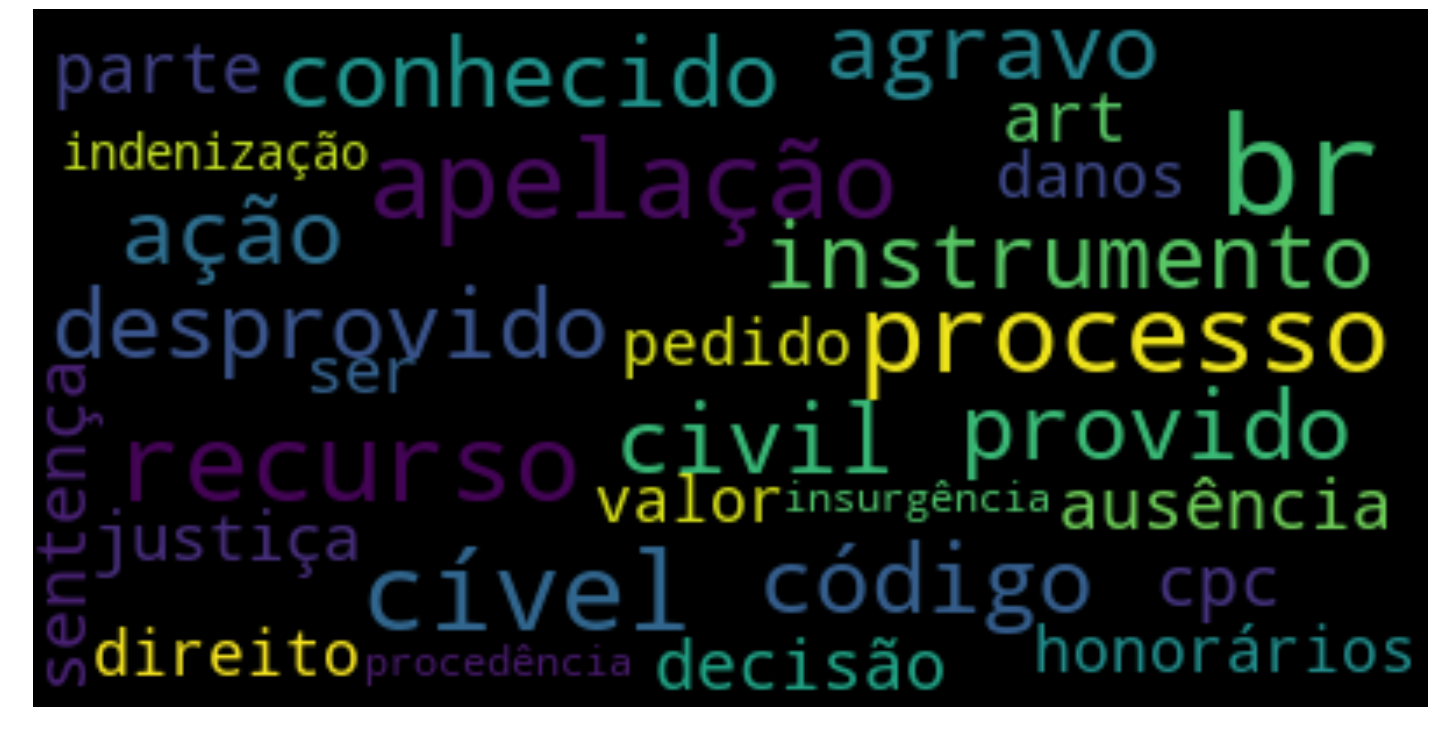

In [13]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

def plot_word_cloud(terms):
    text = terms.index
    text = ' '.join(list(text))
    # lower max_font_size
    wordcloud = WordCloud(max_font_size=40).generate(text)
    plt.figure(figsize=(25, 25))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    
plot_word_cloud(tfidf.sort_values(by=['tfidf'], ascending=True).head(40))